In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


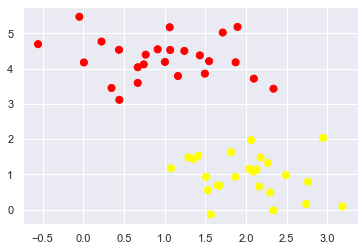

In [6]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

In [9]:
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(X,y)

SVC(kernel='linear')

In [38]:
def plot_svc(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)    
    y = np.linspace(ylim[0],ylim[1],30)
    Y , X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X,Y,P,colors="b",levers=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, linewidth=1, facecolors='none',color='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

<ipython-input-38-92c12375a30b>:11: UserWarning: The following kwargs were not used by contour: 'levers'
  ax.contour(X,Y,P,colors="b",levers=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])


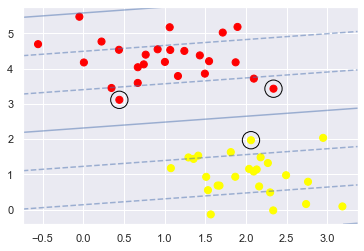

In [39]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc(model)

In [16]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

<ipython-input-38-92c12375a30b>:11: UserWarning: The following kwargs were not used by contour: 'levers'
  ax.contour(X,Y,P,colors="b",levers=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])


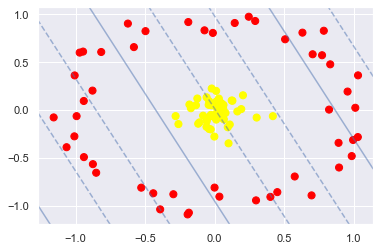

In [40]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=0.1, noise=0.1)
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='autumn')
plot_svc(clf, plot_support=False)

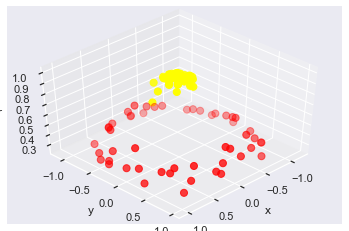

In [43]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev = 30,azim=30,X=X,y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
plot_3D(elev=45,azim=45,X=X, y=y)

In [44]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X,y)

SVC(C=1000000.0)

<ipython-input-38-92c12375a30b>:11: UserWarning: The following kwargs were not used by contour: 'levers'
  ax.contour(X,Y,P,colors="b",levers=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])


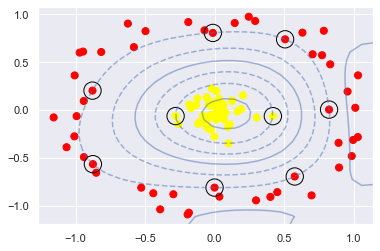

In [46]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc(clf)